In [44]:
dataset1 = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [45]:
type(dataset1)

list

In [69]:
import pandas as pd
df = pd.DataFrame(dataset1)
print(df)

            0         1         2      3      4      5     6
0       Skirt  Sneakers     Scarf  Pants    Hat   None  None
1  Sunglasses     Skirt  Sneakers  Pants    Hat   None  None
2       Dress   Sandals     Scarf  Pants  Heels   None  None
3       Dress  Necklace  Earrings  Scarf    Hat  Heels   Hat
4    Earrings     Skirt     Skirt  Scarf  Shirt  Pants  None


In [47]:
df.columns =['x1','x2','x3','x4','x5','x6','x7']

In [48]:
print(df)

           x1        x2        x3     x4     x5     x6    x7
0       Skirt  Sneakers     Scarf  Pants    Hat   None  None
1  Sunglasses     Skirt  Sneakers  Pants    Hat   None  None
2       Dress   Sandals     Scarf  Pants  Heels   None  None
3       Dress  Necklace  Earrings  Scarf    Hat  Heels   Hat
4    Earrings     Skirt     Skirt  Scarf  Shirt  Pants  None


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

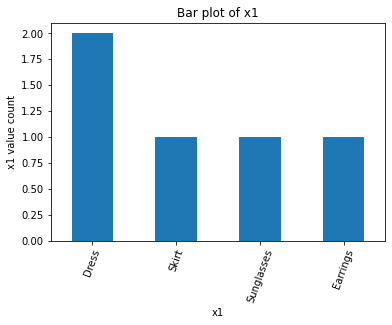

In [50]:
plt.title("Bar plot of x1")
plt.xlabel("x1")
plt.ylabel("x1 value count")
vc=df['x1'].value_counts()
vc.plot.bar(rot=70)

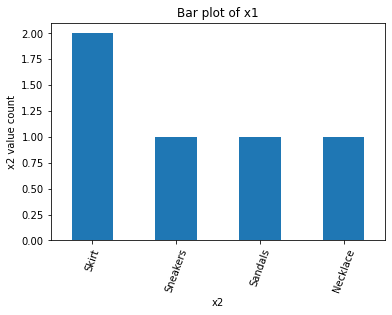

In [51]:
plt.title("Bar plot of x1")
plt.xlabel("x2")
plt.ylabel("x2 value count")
vc=df['x2'].value_counts()
vc.plot.bar(rot=70)

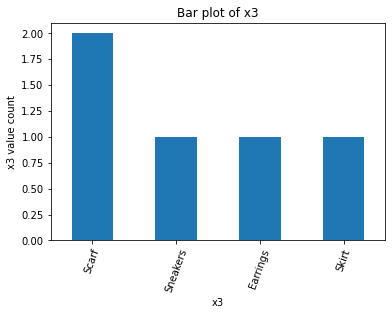

In [52]:
plt.title("Bar plot of x3")
plt.xlabel("x3")
plt.ylabel("x3 value count")
vc=df['x3'].value_counts()
vc.plot.bar(rot=70)

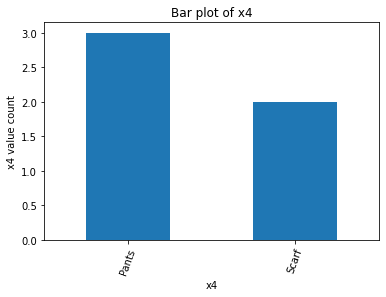

In [53]:
plt.title("Bar plot of x4")
plt.xlabel("x4")
plt.ylabel("x4 value count")
vc=df['x4'].value_counts()
vc.plot.bar(rot=70)

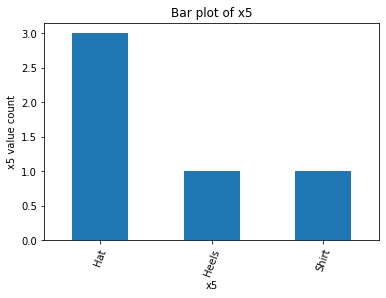

In [54]:
plt.title("Bar plot of x5")
plt.xlabel("x5")
plt.ylabel("x5 value count")
vc=df['x5'].value_counts()
vc.plot.bar(rot=70)

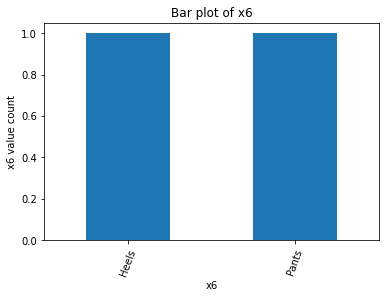

In [55]:
plt.title("Bar plot of x6")
plt.xlabel("x6")
plt.ylabel("x6 value count")
vc=df['x6'].value_counts()
vc.plot.bar(rot=70)

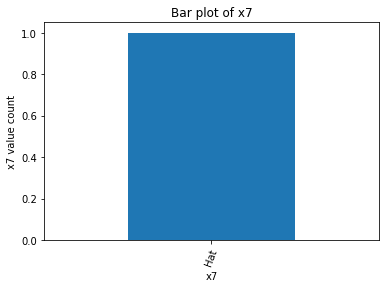

In [56]:
plt.title("Bar plot of x7")
plt.xlabel("x7")
plt.ylabel("x7 value count")
vc=df['x7'].value_counts()
vc.plot.bar(rot=70)

In [57]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder() #need list 
te_ary=te.fit(dataset1).transform(dataset1)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [59]:
#support
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [60]:
#con
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [61]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [62]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [65]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

,,counts
column,value,


In [70]:
counter= (df[:]=='Dress').sum()

In [71]:
counter.sum()

2